In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

In [2]:
data = pd.read_csv("./data/data_230717.csv")

In [3]:
# Data cleaning

# drop missing data rows
data = data.dropna()
# transform the Month column
d = {'march':3, 'aug':8, 'oct':10, 'april':4, 'june':6, 'july':7,'nov':11, 'feb':2, 'may':5, 'sept':9, 'dec':12, 'jan':1, 'august':8, 'october':10}
data['Month'] = data['Month'].map(d)
# drop duplicates
data = data.drop_duplicates(subset=['ID','Month','Year'])
# drop rows with missing price info
missing_price = data[data.Price =="SAVINGS)"]
data = data.drop(index=missing_price.index)
# transform the Price column into float
data['Price'] = data['Price'].str.split('$', expand=True)[1] #split and expand into columns and choose the column with price info
data['Price'] = data['Price'].astype(float)
# create Date column
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1))
# remove all brackets in the description text
data['Description'] = data['Description'].str.replace(r'\s*\(.*\)', '', regex=True)

In [4]:
# Top 50 frequent discounted items
top=50
frequent_discounted_items = data['ID'].value_counts()[:top]
for item_id in frequent_discounted_items.index:
    product_description = data[data.ID==item_id]['Description'].iloc[0]
    print(f"{item_id} {product_description}, {frequent_discounted_items[item_id]}x")

937319 LYSOL ADVANCED TOILET BOWL CLEANER 4 X 946 ML, 24x
4000825 LOGITECH KEYBOARD AND MOUSE MK825 PERFORMANCE, 24x
2964544 FINISH JET DRY ULTRA RINSE AGENT 946 ml, 23x
2743612 OIKOS 3% YOGURT 24 x 100g, 23x
1226088 GAIN HE LIQUID LAUNDRY DETERGENT 146 wash loads, 21x
1424970 CASHMERE PREMIUM 2 PLY BATHROOM TISSUE 40 x 250 sheets, 20x
1218587 SWIFFER DUSTERS REFILLS PACK OF 28, 20x
3886666 FINISH POWERBALL DISHWASHER DETERGENT PACK OF 140, 19x
127993 ALCAN ALUMINUM FOIL 3 pk. 30 cm x 30.48 m, 19x
1232651 OXI CLEAN MAX STAIN REMOVER 5 KG, 19x
1073000 POST HONEY BUNCHES OF OATS 1.4 KG, 19x
24701 HAAGEN-DAZS VANILLA ALMOND BARS 9 X 88 ml, 19x
7774269 BOUNTY PLUS PAPER TOWEL 12 x 91 sheets, 18x
3161251 DOWNY UNSTOPABLES FRESH SCENTED BEADS 1.06 kg, 18x
1134642 BABYBEL LIGHT MINI BABYBEL 28 X 20G, 17x
8827195 FEBREZE AIR EFFECTS VARIETY PACK 4, 17x
362864 MR. CLEAN ALL PURPOSE CLEANER 5.2 L, 17x
310062 PEPSI 32 X 355 ML, 17x
1507482 TIDE ADVANCED POWER 89 WASHLOADS, 17x
1446056 SCOTTIE PRE

## Items categorized by ChatGPT:

1. **Household and Cleaning Products:**
   - LYSOL ADVANCED TOILET BOWL CLEANER 4 X 946 ML, 24x
   - FINISH JET DRY ULTRA RINSE AGENT 946 ml, 23x
   - SWIFFER DUSTERS REFILLS PACK OF 28, 20x
   - FINISH POWERBALL DISHWASHER DETERGENT PACK OF 140, 19x
   - MR. CLEAN ALL PURPOSE CLEANER 5.2 L, 17x
   - ALCAN ALUMINUM FOIL 3 pk. 30 cm x 30.48 m, 19x
   - ZIPLOC LARGE FREEZER BAGS 3 PACKS OF BAGS 50, 14x

2. **Food and Snacks:**
   - POST HONEY BUNCHES OF OATS 1.4 KG, 19x
   - HAAGEN-DAZS VANILLA ALMOND BARS 9 X 88 ml, 19x
   - PEPSI 32 X 355 ML, 17x
   - POST RAISIN BRAN 1.42 kg, 15x
   - TOSTITOS MEDIUM SALSA 2 X 1.21 L, 15x
   - FROMAGERIE BERGERON INSPIRATION PACK 800 G, 15x
   - FROMAGERIE BERGERON CLASSIC 2 x 500 g, 14x
   - FRITO LAY MUNCHIES SNACK MIX 1.1 KG, 13x
   - NESCAFE RICH INSTANT COFFEE 475 G, 15x
   - STARBUCKS CAFFe VERONA 1.13 kg, 13x
   - BROOKSIDE DARK CHOCOLATE ACAI 850G, 16x
   - HAAGEN-DAZS VANILLA ALMOND BARS 9 X 88 ml, 19x
   - WHISKAS DRY CAT FOOD 11.6 kg, 15x

3. **Health and Miscellaneous Products:**
   - OIKOS 3% YOGURT 24 x 100g, 23x
   - GAIN HE LIQUID LAUNDRY DETERGENT 146 wash loads, 21x
   - CASHMERE PREMIUM 2 PLY BATHROOM TISSUE 40 x 250 sheets, 20x
   - BOUNTY PLUS PAPER TOWEL 12 x 91 sheets, 18x
   - SCOTTIE PREMIUM FACIAL TISSUES 2 PLY 20 x 126 sheets, 17x
   - MR. CLEAN MAGIC ERASER pack of 9, 14x
   - ORGANIKA ENHANCED COLLAGEN 1KG, 14x
   - YOUTHEORY COLLAGEN 390 TABLETS, 14x
   - BAYER ALEVE 220 MG 250 CAPS, 14x
   - DR-HO’S CIRCULATION PROMOTER WITH ACCESSORIES, 14x

In [5]:
# find product id by keyword
keyword = "whey"
results = data['Description'].str.lower()
results = results.str.contains(keyword)
selected = data[results]
selected.drop('url', axis=1).sort_values(by=['ID', 'Date'])

,ID,Description,Price,Month,Year,Date
13004,1064829,LEANFIT NATURALS WHEY PROTEIN CHOCOLATE 2 KG,29.99,8,2021,2021-08-01
11374,1064829,LEANFIT NATURALS WHEY PROTEIN CHOCOLATE 2 kg,32.99,1,2022,2022-01-01
8176,1064829,LEANFIT NATURALS WHEY PROTEIN CHOCOLATE 2 kg,32.99,2,2022,2022-02-01
13003,1064839,LEANFIT NATURALS WHEY PROTEIN VANILLA 2 KG,29.99,8,2021,2021-08-01
11365,1064839,LEANFIT NATURALS WHEY PROTEIN VANILLA 2 KG,32.99,1,2022,2022-01-01
8175,1064839,LEANFIT NATURALS WHEY PROTEIN VANILLA 2 KG,32.99,2,2022,2022-02-01
329,1676851,WHEY GOURMET ISOLATE VANILLA 2 kg,49.99,10,2022,2022-10-01
13582,1676851,WHEY GOURMET ISOLATE VANILLA 2 kg,54.99,1,2023,2023-01-01
1940,1676851,WHEY GOURMET ISOLATE VANILLA 2 kg,54.99,2,2023,2023-02-01
10791,1676851,WHEY GOURMET ISOLATE VANILLA 2 kg,54.99,5,2023,2023-05-01


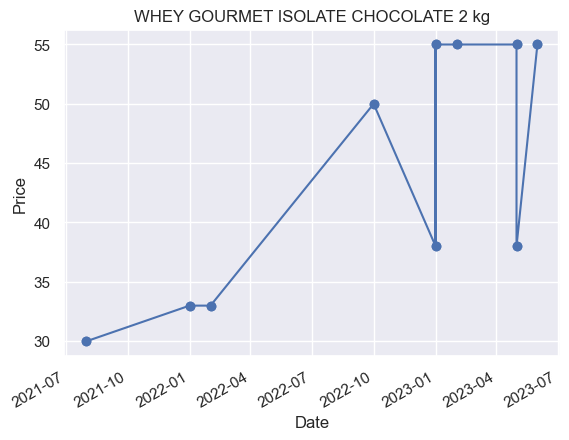

In [6]:
selected.plot(x='Date', y='Price', ylabel='Price', marker='o', title=selected['Description'].iloc[0], legend=False)
plt.show()

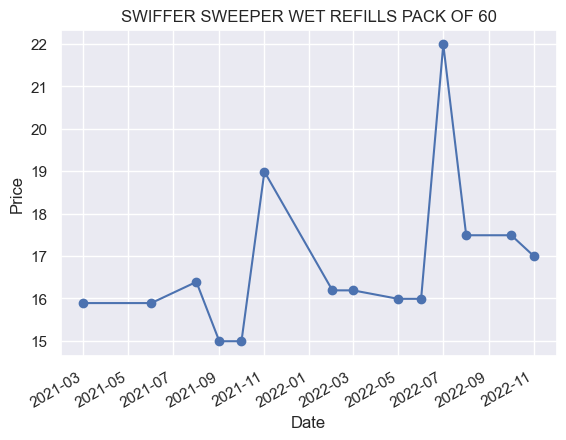

In [7]:
# plot if you know the product_id
product_id = '380446'
product = data[data['ID']==product_id]
product.plot(x='Date', y='Price', ylabel='Price', marker='o', title=product['Description'].iloc[0], legend=False)
plt.show()